# Dataset Filtering – Per-Class Statistics

This notebook loads the *clean* and *rejected* folders produced by the filtering
script and computes, for every letter (A–Z), how many images were kept or
discarded. It then visualises the per-class rejection percentage.

In [2]:
from pathlib import Path
import string
import matplotlib.pyplot as plt

In [4]:
CLEAN_DIR   = Path("../data/filtered/clean")
REJECT_DIR  = Path("../data/filtered/rejected")

In [5]:
def count_by_subdir(base: Path) -> dict[str, int]:
    """
    Return {subfolder_name: number_of_files} for immediate children of *base*.
    Only *.jpg files are counted.
    """
    counts = {}
    for sub in base.iterdir():
        if sub.is_dir():
            counts[sub.name] = len(list(sub.glob("*.jpg")))
    return counts

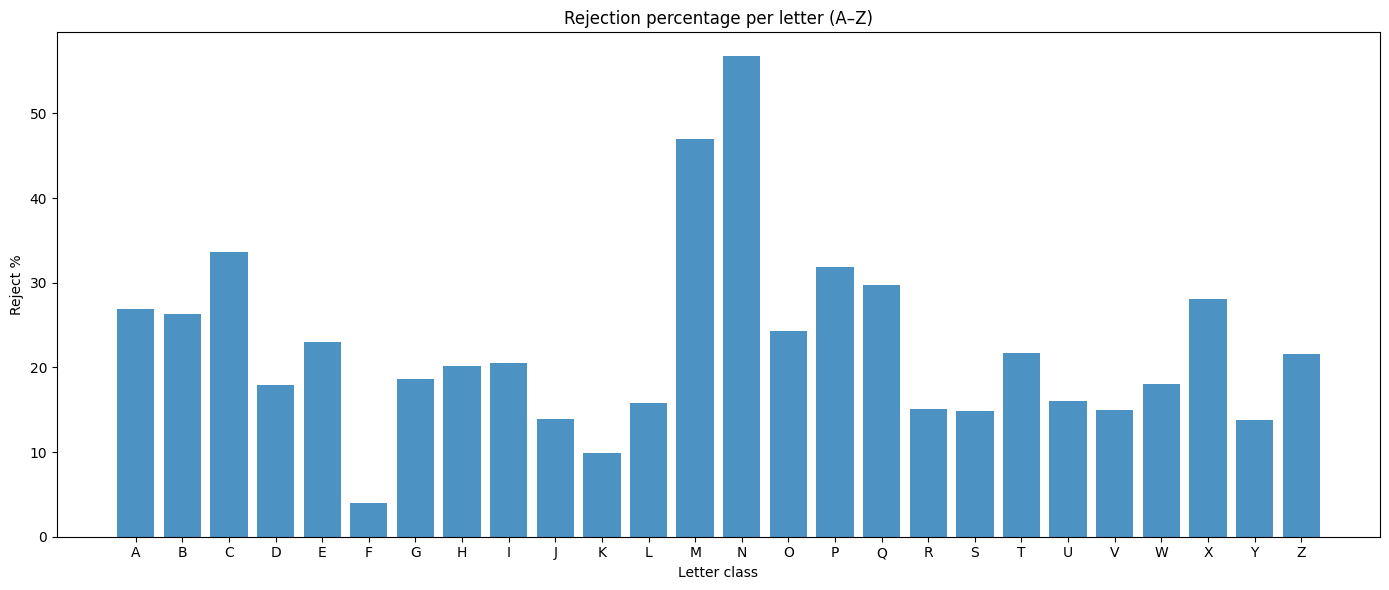

In [6]:
kept    = count_by_subdir(CLEAN_DIR)
rejected = count_by_subdir(REJECT_DIR)

letters     = list(string.ascii_uppercase)
reject_pct  = []
for l in letters:
    k   = kept.get(l, 0)
    r   = rejected.get(l, 0)
    total = k + r
    pct   = (r / total * 100) if total else 0.0
    reject_pct.append(pct)

# Bar plot
plt.figure(figsize=(14, 6))
plt.bar(letters, reject_pct, alpha=0.8)
plt.ylabel("Reject %")
plt.xlabel("Letter class")
plt.title("Rejection percentage per letter (A–Z)")
plt.tight_layout()
plt.show()